In [3]:
#import the required libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
#Load the data file


Marketing = pd.read_csv(r"C:\Users\Lucy\Downloads\archive (35).zip")

In [6]:
Marketing.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
# Checking for duplicates
len(Marketing[Marketing.duplicated()])

0

In [27]:
#Numbers of col & rows
Marketing.shape


(588101, 7)

In [28]:
# Checking for nulls

Marketing.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [29]:
#Convert the boolean True/False values, to int

#converted: If a person bought the product then True, else is False


Marketing["converted"] = np.where(Marketing["converted"]==True, 1, 0)


In [31]:
#dropped a col

Marketing.drop('Unnamed: 0', axis=1, inplace=True)


In [34]:
Marketing.describe()

,user id,converted,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.025239,24.820876,14.469061
std,2.022260e+05,0.156850,43.715181,4.834634
min,9.000000e+05,0.000000,1.000000,0.000000
25%,1.143190e+06,0.000000,4.000000,11.000000
50%,1.313725e+06,0.000000,13.000000,14.000000
75%,1.484088e+06,0.000000,27.000000,18.000000
max,1.654483e+06,1.000000,2065.000000,23.000000


In [37]:
#Univariate Analysis


def plot_count(col):
    ax = sns.countplot(x=Marketing[col], palette=sns.color_palette('flare'))
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'"{col}" Categories Count')
    plt.show()



In [38]:
def plot_dist(col):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(x=Marketing[col], kde=True, ax=ax1)
    plt.title(f'Histogram of "{col}"')
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x=Marketing[col], ax=ax2)
    plt.title(f'Boxplot of "{col}"')
    
    plt.show()


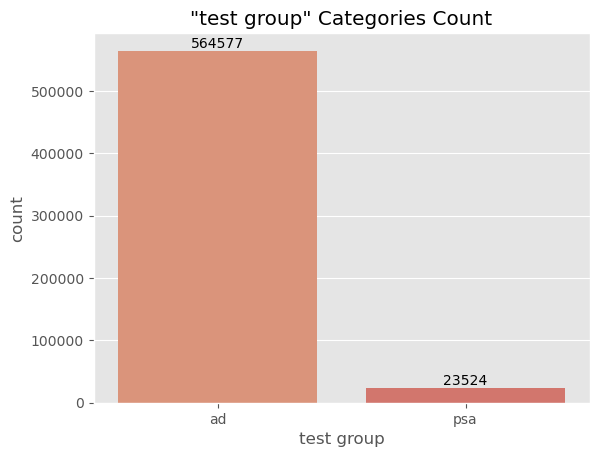

In [39]:
#number and histogram of different test group / campaigns that were viewed by customers-consumers
#The ad was certainly viewed way more than from the public service annoucements


plot_count('test group')

% Not converted 97.4761137967798
% Converted 2.523886203220195


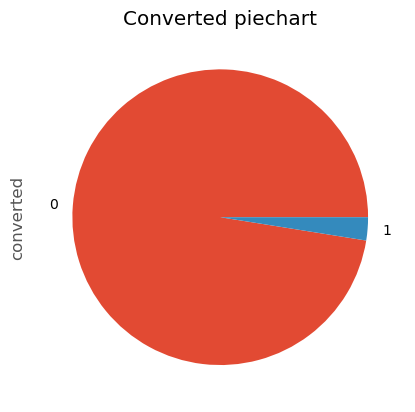

In [40]:
#Numbers and piechart of those who converted and decided to choose the offer based on the different marketinig campaign
#a portion (2.52%) of those who viewed the different marketing campaings were converted and decided to follow the new marketing product




print("% Not converted", 100 * Marketing["converted"].value_counts()[0]/Marketing["converted"].value_counts().sum())
print("% Converted", 100 * Marketing["converted"].value_counts()[1]/Marketing["converted"].value_counts().sum())

ax = Marketing["converted"].value_counts().plot(kind="pie")
ax.set_title('Converted piechart')
plt.show()

In [41]:
#Calculate conversion rates
#it can be concluded that the ad group achieved a higher conversion rate (2.5547%) compared to the PSA group (1.7854%)
#This indicates that the advertisements were successful in generating conversions and the overall ad campaign was effective.




Marketing.groupby("test group")["converted"].mean()*100


test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

converted        0      1
test group               
ad          550154  14423
psa          23104    420


<AxesSubplot:xlabel='test group'>

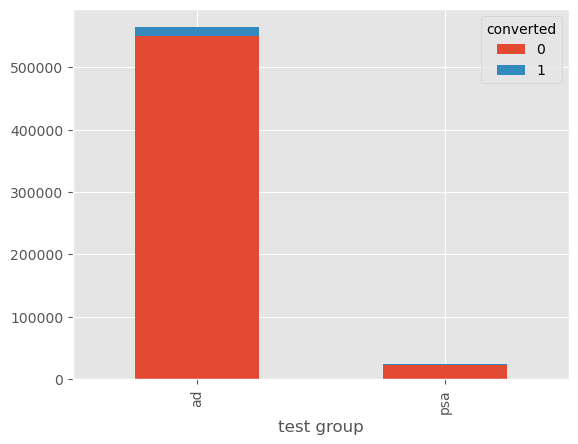

In [42]:
#Bivariate Analysis


print(Marketing.groupby("converted")["test group"].value_counts().unstack('converted'))

Marketing.groupby("converted")["test group"].value_counts().unstack('converted').plot(kind="bar", stacked=True)






converted  test group
0          psa           23104
1          psa             420
Name: test group, dtype: int64


<AxesSubplot:xlabel='converted,test group'>

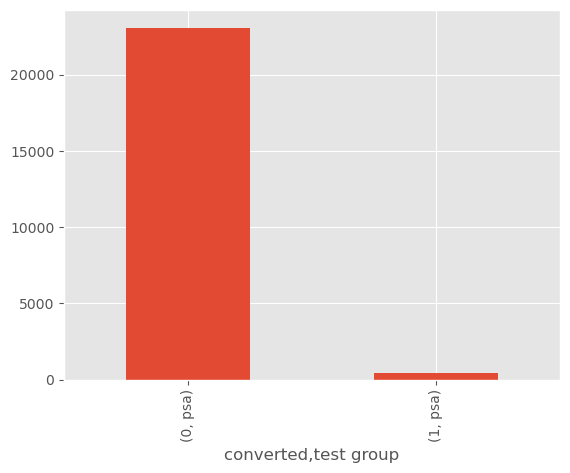

In [47]:
#Inspecting those who took part of Public Service accouncements campaings

print(Marketing.loc[Marketing["test group"]=="psa"].groupby("converted")["test group"].value_counts())
Marketing.loc[Marketing["test group"]=="psa"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)


converted  test group
0          ad            550154
1          ad             14423
Name: test group, dtype: int64


<AxesSubplot:xlabel='converted,test group'>

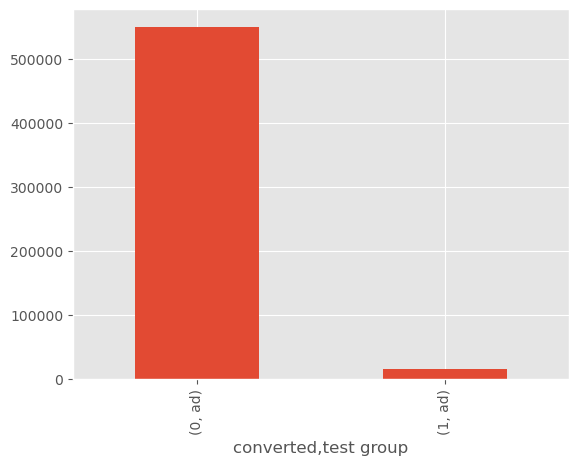

In [48]:
#Inspecting those who took part of AD campaings

print(Marketing.loc[Marketing["test group"]=="ad"].groupby("converted")["test group"].value_counts())
Marketing.loc[Marketing["test group"]=="ad"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)


most ads day
Friday       2057
Monday       2857
Saturday     1719
Sunday       2090
Thursday     1790
Tuesday      2312
Wednesday    2018
Name: converted, dtype: int32


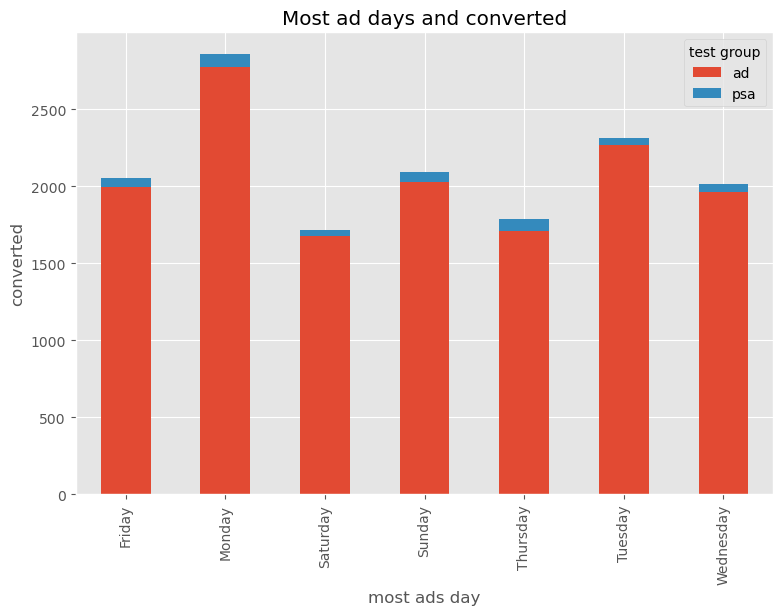

In [49]:
#Most profitable days and those who converted with new marketing campaings
#Seems Monday is the the best day to air adventishments and seems Tuesday for public service anouncement campaings

print(Marketing.groupby("most ads day")["converted"].sum())

ax =Marketing.groupby(by =['most ads day', 'test group']).sum()['converted'].unstack('test group').plot(kind='bar', figsize=(9,6), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

most ads day
Friday       1995
Monday       2778
Saturday     1679
Sunday       2027
Thursday     1711
Tuesday      2270
Wednesday    1963
Name: converted, dtype: int32


<AxesSubplot:xlabel='most ads day'>

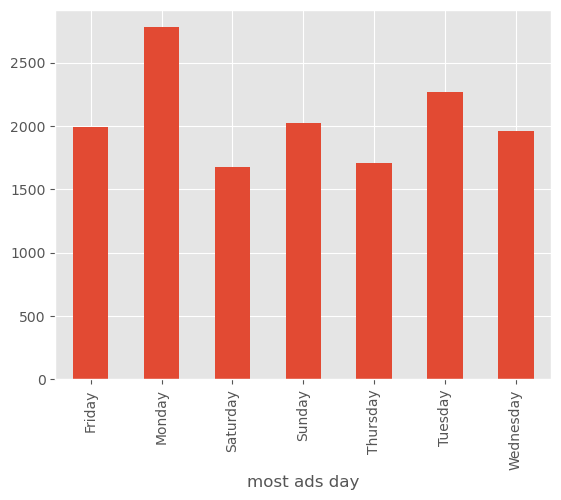

In [50]:
#for Advertishement campaigns, Monday had the greatest conversion?



print(Marketing.loc[Marketing["test group"]=="ad"].groupby("most ads day")["converted"].sum())
Marketing.loc[Marketing["test group"]=="ad"].groupby("most ads day")["converted"].sum().plot(kind="bar")

most ads day
Friday       62
Monday       79
Saturday     40
Sunday       63
Thursday     79
Tuesday      42
Wednesday    55
Name: converted, dtype: int32


<AxesSubplot:xlabel='most ads day'>

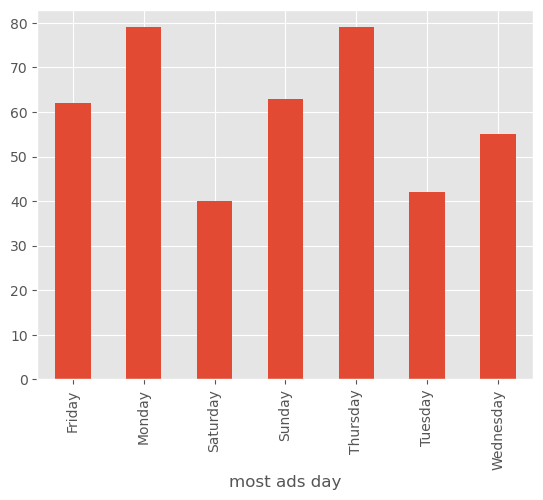

In [51]:
#For Public Service Anouncement campaigns, wMonday and Thursday had the greatest conversion?


print(Marketing.loc[Marketing["test group"]=="psa"].groupby("most ads day")["converted"].sum())
Marketing.loc[Marketing["test group"]=="psa"].groupby("most ads day")["converted"].sum().plot(kind="bar")

most ads hour
0      102
1       62
2       39
3       28
4       11
5       16
6       46
7      116
8      344
9      595
10     838
11    1022
12    1127
13    1176
14    1281
15    1325
16    1156
17     987
18     885
19     811
20     862
21     867
22     690
23     457
Name: converted, dtype: int32


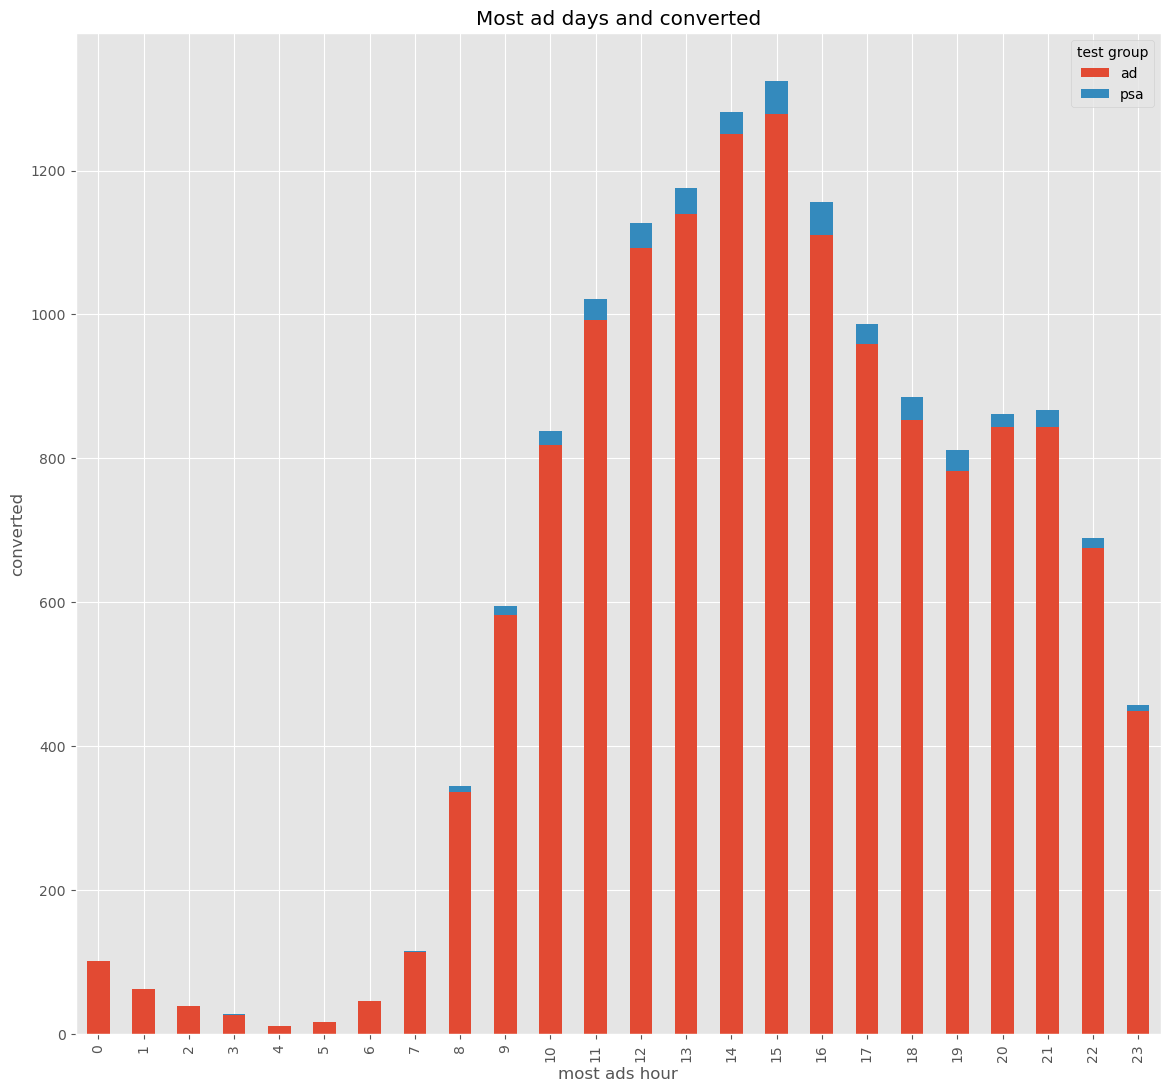

In [52]:
#Most profitable hours with new marketing campaings
#The most profitable hour for both campaings in the 15th hour, we need to inspect further for each of the 2 campaings.



print(Marketing.groupby("most ads hour")["converted"].sum())

ax = Marketing.groupby(by =['most ads hour', 'test group'])['converted'].sum().unstack('test group').plot(kind= 'bar', figsize= (14,13), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

most ads hour
0      102
1       62
2       39
3       27
4       11
5       16
6       46
7      114
8      337
9      582
10     818
11     992
12    1092
13    1140
14    1251
15    1279
16    1111
17     959
18     853
19     782
20     843
21     843
22     675
23     449
Name: converted, dtype: int32


<AxesSubplot:xlabel='most ads hour'>

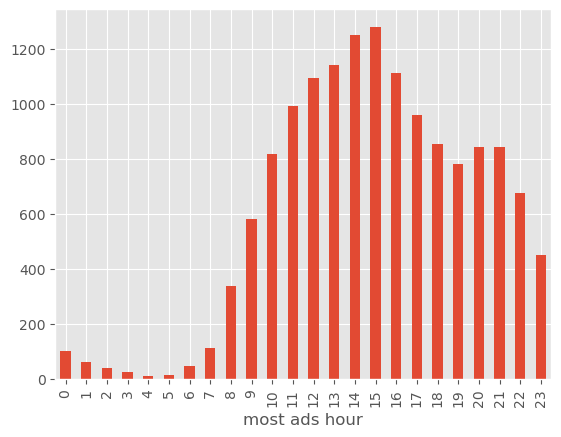

In [53]:
#for Advertishement campaigns, 15th hour had the greatest conversion?



print(Marketing.loc[Marketing["test group"]=="ad"].groupby("most ads hour")["converted"].sum())
Marketing.loc[Marketing["test group"]=="ad"].groupby("most ads hour")["converted"].sum().plot(kind="bar")

most ads hour
0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      2
8      7
9     13
10    20
11    30
12    35
13    36
14    30
15    46
16    45
17    28
18    32
19    29
20    19
21    24
22    15
23     8
Name: converted, dtype: int32


<AxesSubplot:xlabel='most ads hour'>

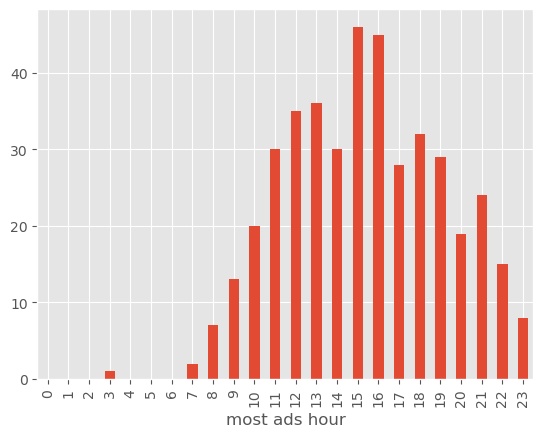

In [54]:
#for Public Service campaigns, 15th hour had the greatest conversion?





print(Marketing.loc[Marketing["test group"]=="psa"].groupby("most ads hour")["converted"].sum())
Marketing.loc[Marketing["test group"]=="psa"].groupby("most ads hour")["converted"].sum().plot(kind="bar")

In [62]:
#conclusions and recommendations
#i suggest we run our most of our ads on mondays or tuesdays between 15th hours 


#About Dataset
#Marketing A/B testing dataset
#Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

#The companies are interested in answering two questions:

#Would the campaign be successful?
#If the campaign was successful, how much of that success could be attributed to the ads?
#With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

#The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

#Data dictionary:

#Index: Row index
#user id: User ID (unique)
#test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
#converted: If a person bought the product then True, else is False
#total ads: Amount of ads seen by person
#most ads day: Day that the person saw the biggest amount of ads
#most ads hour: Hour of day that the person saw the biggest amount of ads
 
